# Exploratory Data Analysis (EDA) and Visualization

This notebook performs a comprehensive exploratory data analysis (EDA) on the dataset `sub_division_population_of_pakistan.csv`. The goal is to understand the data, clean it, engineer useful features, and derive insights through visualizations and statistical analysis.

## 1. Dataset Introduction

In this section, we will load the dataset, display its structure, and understand its basic properties. This includes:
- Printing column names and dataset shape
- Displaying the first 5 rows of the dataset

In [289]:
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [290]:
# Define the dataset path
data_path = 'sub-division_population_of_pakistan.csv'

try:
    # Load the dataset
    df = pd.read_csv(data_path)
    print(f"Dataset '{data_path}' loaded successfully.")

    # Display column names and dataset shape
    print("\nColumn Names:", df.columns.tolist())
    print("Dataset Shape:", df.shape)

    # Display the first 5 rows of the dataset
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{data_path}' was not found. Please ensure it is in the working directory.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset 'sub-division_population_of_pakistan.csv' loaded successfully.

Column Names: ['PROVINCE', 'DIVISION', 'DISTRICT', 'SUB DIVISION', 'AREA (sq.km)', 'ALL SEXES (RURAL)', 'MALE (RURAL)', 'FEMALE (RURAL)', 'TRANSGENDER (RURAL)', 'SEX RATIO (RURAL)', 'AVG HOUSEHOLD SIZE (RURAL)', 'POPULATION 1998 (RURAL)', 'ANNUAL GROWTH RATE (RURAL)', 'ALL SEXES (URBAN)', 'MALE (URBAN)', 'FEMALE (URBAN)', 'TRANSGENDER (URBAN)', 'SEX RATIO (URBAN)', 'AVG HOUSEHOLD SIZE (URBAN)', 'POPULATION 1998 (URBAN)', 'ANNUAL GROWTH RATE (URBAN)']
Dataset Shape: (528, 21)


,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),...,POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,...,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,...,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,...,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,...,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,...,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48


## 2. Data Cleaning

In this section, we will clean and standardize the dataset by:
- Cleaning and standardizing column names
- Checking for missing values and duplicates
- Handling missing values and fixing data types if required

In [291]:
# Clean and standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Standardized column names:", df.columns.tolist())

Standardized column names: ['province', 'division', 'district', 'sub_division', 'area_(sq.km)', 'all_sexes_(rural)', 'male_(rural)', 'female_(rural)', 'transgender_(rural)', 'sex_ratio_(rural)', 'avg_household_size_(rural)', 'population_1998_(rural)', 'annual_growth_rate_(rural)', 'all_sexes_(urban)', 'male_(urban)', 'female_(urban)', 'transgender_(urban)', 'sex_ratio_(urban)', 'avg_household_size_(urban)', 'population_1998_(urban)', 'annual_growth_rate_(urban)']


In [292]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Handle missing values (example: fill numeric columns with median)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Filled missing values in '{col}' with median.")


Missing values per column:
province                      0
division                      0
district                      0
sub_division                  0
area_(sq.km)                  0
all_sexes_(rural)             0
male_(rural)                  0
female_(rural)                0
transgender_(rural)           0
sex_ratio_(rural)             0
avg_household_size_(rural)    0
population_1998_(rural)       0
annual_growth_rate_(rural)    0
all_sexes_(urban)             0
male_(urban)                  0
female_(urban)                0
transgender_(urban)           0
sex_ratio_(urban)             0
avg_household_size_(urban)    0
population_1998_(urban)       0
annual_growth_rate_(urban)    0
dtype: int64


In [293]:
# Remove duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")

Removed 0 duplicate rows.


## 3. Feature Engineering

In this section, we will create new columns to enhance the dataset, such as:
- `total_population`: Sum of rural and urban populations
- `population_density`: Total population divided by area

In [294]:
# Create 'total_population' column
if 'all_sexes_(rural)' in df.columns and 'all_sexes_(urban)' in df.columns:
    df['total_population'] = df['all_sexes_(rural)'] + df['all_sexes_(urban)']
    print("Created 'total_population' column.")
else:
    print("Required columns for 'total_population' not found.")

# Create 'population_density' column
if 'total_population' in df.columns and 'area_(sq.km)' in df.columns:
    df['population_density'] = df['total_population'] / df['area_(sq.km)']
    print("Created 'population_density' column.")
else:
    print("Required columns for 'population_density' not found.")

# Display the first few rows of the new columns
if 'total_population' in df.columns and 'population_density' in df.columns:
    display(df[['total_population', 'population_density']].head())

Created 'total_population' column.
Created 'population_density' column.


,total_population,population_density
0,813390,470.439560
1,689766,459.844000
2,422768,166.706625
3,524715,405.185328
4,525017,288.788229


## 4. Descriptive Statistics & Distribution

In this section, we will analyze the dataset using descriptive statistics and visualize the distributions of key features. This includes:
- Summary statistics
- Histograms for rural, urban, and total population
- Boxplots for outlier detection
- Density plots for population comparisons

In [295]:
# Summary statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


c:\Users\ll\miniconda3\envs\py_dsa35\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,area_(sq.km),all_sexes_(rural),male_(rural),female_(rural),transgender_(rural),sex_ratio_(rural),avg_household_size_(rural),population_1998_(rural),annual_growth_rate_(rural),all_sexes_(urban),male_(urban),female_(urban),transgender_(urban),sex_ratio_(urban),avg_household_size_(urban),population_1998_(urban),annual_growth_rate_(urban),total_population,population_density
count,528.000000,5.280000e+02,5.280000e+02,5.280000e+02,528.000000,528.000000,528.000000,5.280000e+02,528.000000,5.280000e+02,5.280000e+02,5.280000e+02,528.000000,528.000000,528.000000,5.280000e+02,528.000000,5.280000e+02,528.000000
mean,1492.005871,2.462780e+05,1.252757e+05,1.209841e+05,18.174242,98.982614,6.277064,1.674280e+05,3.124792,1.408635e+05,7.284339e+04,6.799787e+04,22.276515,75.411269,4.406402,8.014457e+04,1.920814,3.871415e+05,inf
std,2039.453778,2.711898e+05,1.375630e+05,1.337169e+05,25.522248,26.812660,2.074947,1.783890e+05,9.577872,3.512463e+05,1.823492e+05,1.688725e+05,66.068127,49.687341,2.948336,2.023120e+05,2.098908,4.779568e+05,NaN
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.665000e+03,1.384725
25%,425.000000,5.093450e+04,2.712725e+04,2.397900e+04,1.000000,101.105000,5.700000,3.527350e+04,1.440000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,9.845200e+04,82.996936
50%,882.000000,1.652410e+05,8.413450e+04,8.204400e+04,10.000000,105.285000,6.310000,1.172065e+05,2.030000,4.325450e+04,2.198000e+04,2.099900e+04,3.000000,103.195000,5.755000,2.129800e+04,1.855000,2.600840e+05,358.087498
75%,1734.250000,3.129112e+05,1.605022e+05,1.522190e+05,25.000000,108.347500,7.200000,2.130542e+05,2.812500,1.178148e+05,6.030175e+04,5.746525e+04,19.000000,107.040000,6.340000,6.542225e+04,2.985000,4.603105e+05,677.556276
max,18374.000000,2.297375e+06,1.172995e+06,1.124167e+06,213.000000,139.380000,12.430000,1.044035e+06,100.000000,3.653616e+06,1.905921e+06,1.746900e+06,795.000000,297.810000,10.060000,2.075867e+06,19.780000,4.267198e+06,inf


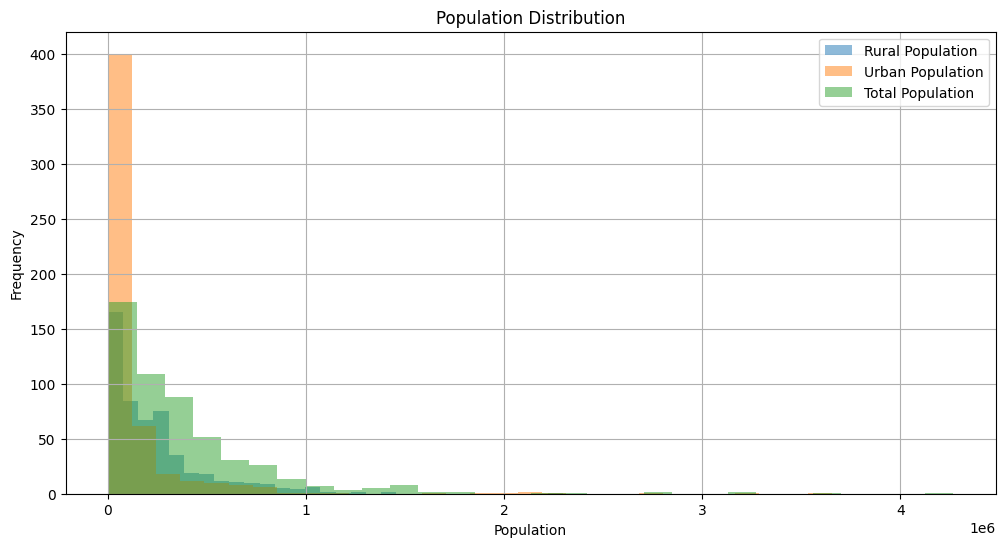

In [296]:
# Histograms for rural, urban, and total population
plt.figure(figsize=(12, 6))
df['all_sexes_(rural)'].hist(bins=30, alpha=0.5, label='Rural Population')
df['all_sexes_(urban)'].hist(bins=30, alpha=0.5, label='Urban Population')
df['total_population'].hist(bins=30, alpha=0.5, label='Total Population')
plt.title('Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()



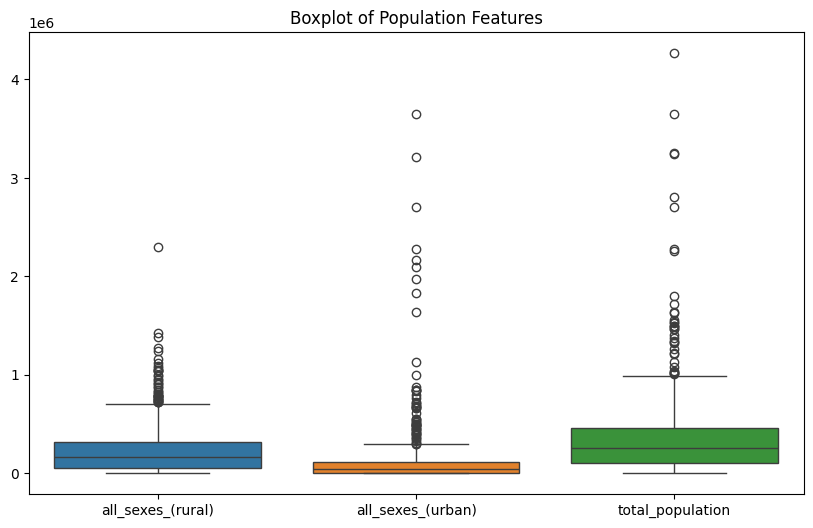

In [297]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['all_sexes_(rural)', 'all_sexes_(urban)', 'total_population']])
plt.title('Boxplot of Population Features')
plt.show()

## 5. Grouped Analysis

In this section, we will perform grouped analysis to derive insights, such as:
- Total population by province
- Mean and sum population by district
- Top 10 most and least populated sub-divisions

In [298]:
# Total population by province
if 'province' in df.columns and 'total_population' in df.columns:
    province_pop = df.groupby('province')['total_population'].sum().sort_values(ascending=False)
    print("\nTotal Population by Province:")
    display(province_pop)
    


Total Population by Province:


province
PUNJAB         109054593
SINDH           47844275
KPK             30497911
BALOCHISTAN     12286335
KPK/FATA         4727619
Name: total_population, dtype: int64

In [299]:
# Mean and sum population by district
if 'district' in df.columns and 'total_population' in df.columns:
    district_stats = df.groupby('district')['total_population'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False)
    print("\nPopulation Statistics by District:")
    display(district_stats)


Population Statistics by District:


,mean,sum
district,,
LAHORE DISTRICT,2.223997e+06,11119985
FAISALABAD DISTRICT,1.313741e+06,7882444
RAWALPINDI DISTRICT,7.717686e+05,5402380
GUJRANWALA DISTRICT,1.002213e+06,5011066
RAHIM YAR KHAN DISTRICT,1.201940e+06,4807762
...,...,...
HARNAI DISTRICT,3.235067e+04,97052
FR D.I.KHAN DISTRICT,6.850600e+04,68506
FR PESHAWAR DISTRICT,6.476100e+04,64761


 Top 10 Most Populated Sub-Divisions:


,sub_division,total_population
455,PESHAWAR TEHSIL,4267198
71,LAHORE CITY TEHSIL,3653616
117,RAWALPINDI TEHSIL,3256641
33,FAISALABAD CITY TEHSIL,3244259
47,GUJRANWALA SADDAR TEHSIL,2806529
72,MODEL TOWN TEHSIL,2703569
74,SHALIMAR TEHSIL,2281557
91,MULTAN CITY TEHSIL,2259115
65,SIALKOT TEHSIL,1796151
369,QUETTA CITY TEHSIL,1722746


C:\Users\ll\AppData\Local\Temp\ipykernel_7156\1669449477.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, y='sub_division', x='total_population', palette='viridis')


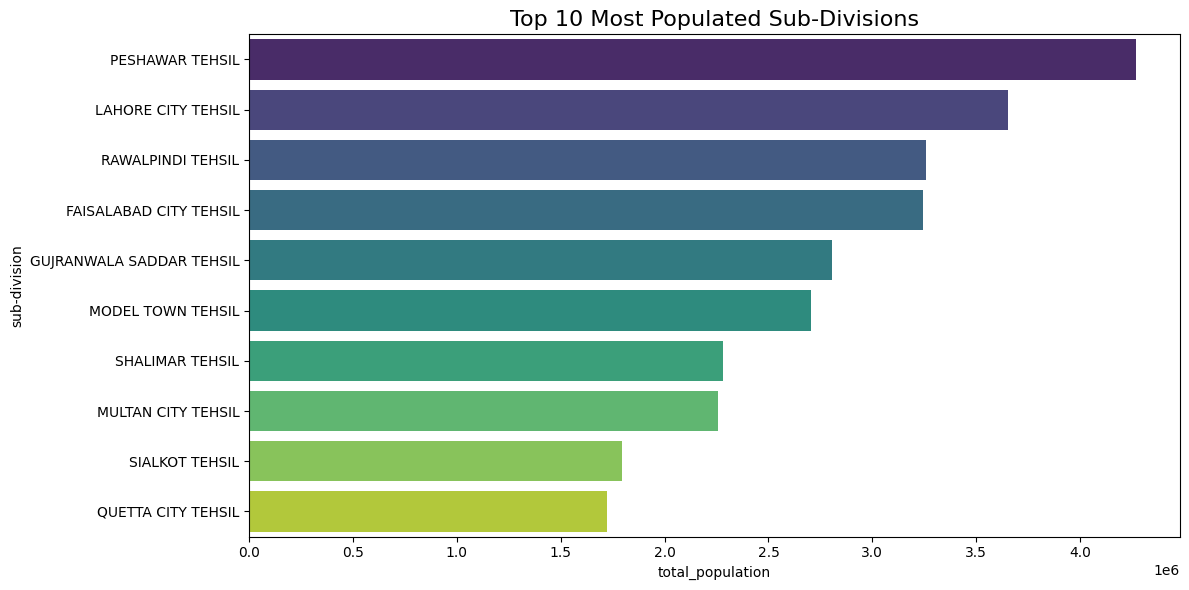

In [300]:


# Top 10 most populated sub-divisions
top10 = df.nlargest(10, 'total_population')[['sub_division', 'total_population']]

# Display as table
from IPython.display import display
print(" Top 10 Most Populated Sub-Divisions:")
display(top10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top10, y='sub_division', x='total_population', palette='viridis')
plt.title("Top 10 Most Populated Sub-Divisions", fontsize=16)
plt.xlabel("total_population")
plt.ylabel("sub-division")
plt.tight_layout()
plt.show()


📉 Least 10 Populated Sub-Divisions:


,sub_division,total_population
388,SANGAN SUB-TEHSIL,2665
482,BAR CHAMER KAND TEHSIL,2868
407,KASHATOO SUB-TEHSIL,5184
284,GAZG SUB-TEHSIL,5721
386,KOT MANDAI SUB-TEHSIL,7583
340,MIRPUR SUB-TEHSIL,9441
377,SANGSILLAH SUB-TEHSIL,10217
285,JOHAN SUB-TEHSIL,10708
322,SUNTSER SUB-TEHSIL,10886
306,LIARI TEHSIL,11730


C:\Users\ll\AppData\Local\Temp\ipykernel_7156\2486030489.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=least10, y='sub_division', x='total_population', palette='rocket')


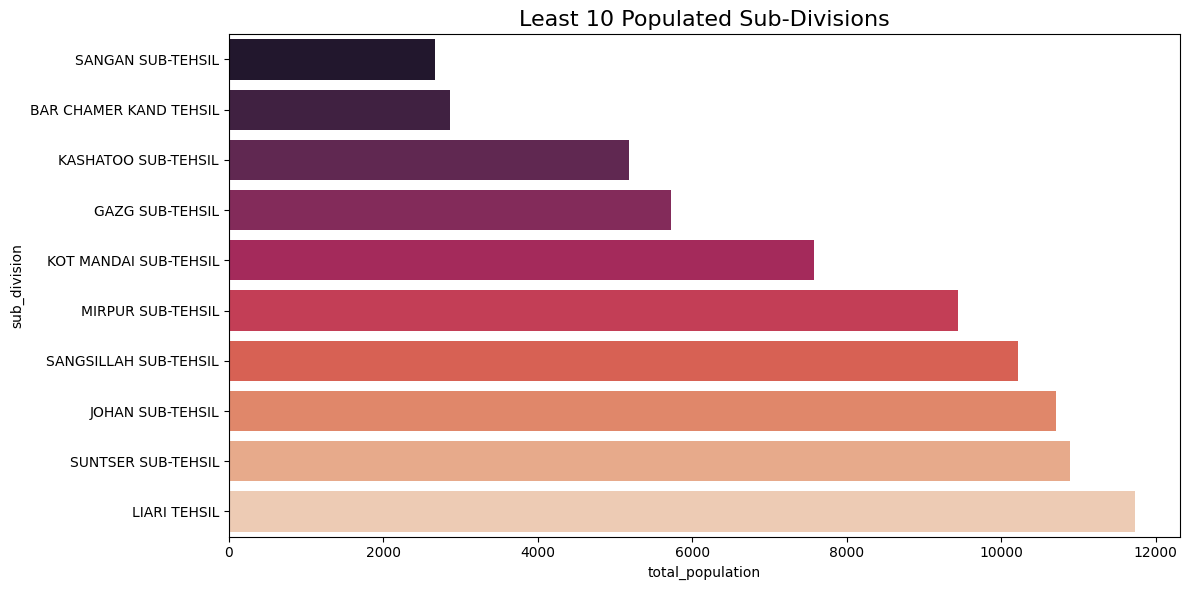

In [301]:
# 🧾 Show Least 10 Populated Sub-Divisions
least10 = df.nsmallest(10, 'total_population')[['sub_division', 'total_population']]
print("📉 Least 10 Populated Sub-Divisions:")
display(least10)

# 📊 Plot the data
plt.figure(figsize=(12,6))
sns.barplot(data=least10, y='sub_division', x='total_population', palette='rocket')
plt.title("Least 10 Populated Sub-Divisions", fontsize=16)
plt.xlabel("total_population")
plt.ylabel("sub_division")
plt.tight_layout()
plt.show()


## 6. Data Visualizations

In this section, we will create various visualizations to better understand the dataset, including:
- Bar chart: Total population by province
- Horizontal bar chart: Top 10 most populated sub-divisions
- Pie chart: Top 5 provinces by population
- Heatmap: Correlations between numeric features
- Violin plot: Population density by province

C:\Users\ll\AppData\Local\Temp\ipykernel_7156\4115625144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=province_pop.index, y=province_pop.values, palette='tab10')
C:\Users\ll\AppData\Local\Temp\ipykernel_7156\4115625144.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ll\miniconda3\envs\py_dsa35\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


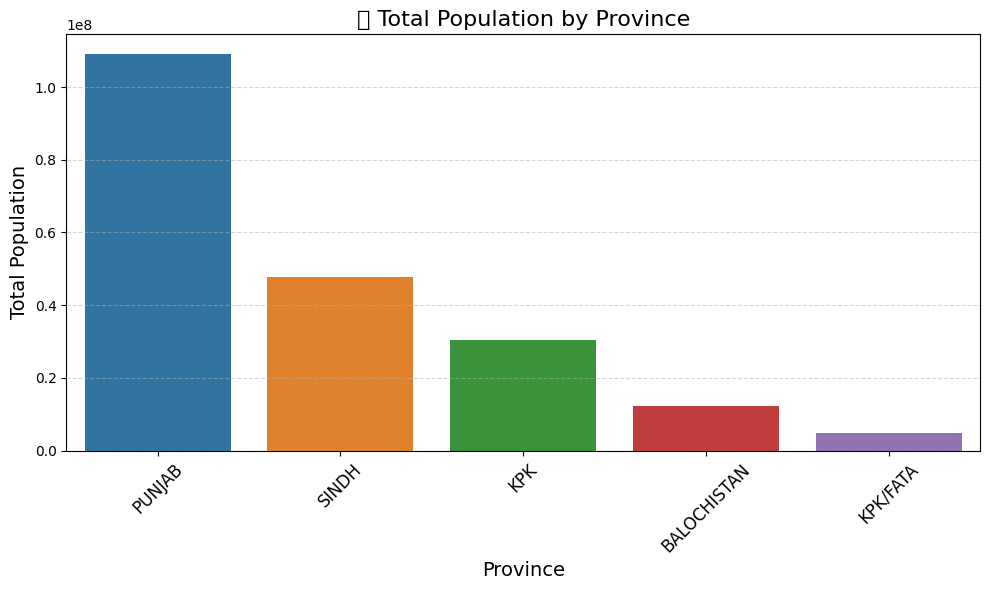

In [304]:
# 🎯 1. Bar chart: Total population by province
plt.figure(figsize=(10, 6))
province_pop = df.groupby('province')['total_population'].sum().sort_values(ascending=False)
sns.barplot(x=province_pop.index, y=province_pop.values, palette='tab10')
plt.title('📊 Total Population by Province', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Total Population', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\ll\AppData\Local\Temp\ipykernel_7156\367159124.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_subdivisions.index, x=top_subdivisions.values, palette='tab10')
C:\Users\ll\AppData\Local\Temp\ipykernel_7156\367159124.py:9: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ll\miniconda3\envs\py_dsa35\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ll\miniconda3\envs\py_dsa35\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


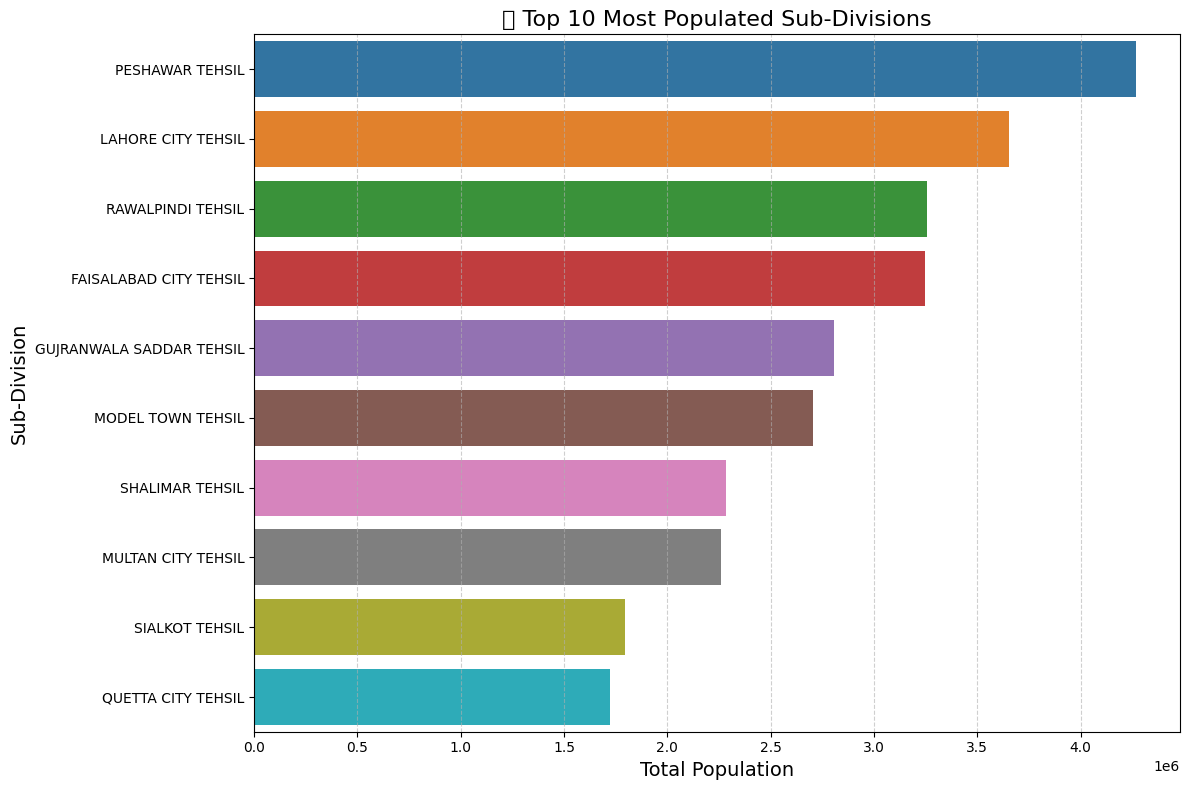

In [305]:
# 🎯 2. Horizontal bar chart: Top 10 Sub-Divisions
plt.figure(figsize=(12, 8))
top_subdivisions = df.groupby('sub_division')['total_population'].sum().nlargest(10)
sns.barplot(y=top_subdivisions.index, x=top_subdivisions.values, palette='tab10')
plt.title('🔝 Top 10 Most Populated Sub-Divisions', fontsize=16)
plt.xlabel('Total Population', fontsize=14)
plt.ylabel('Sub-Division', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\ll\AppData\Local\Temp\ipykernel_7156\136232728.py:7: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ll\miniconda3\envs\py_dsa35\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


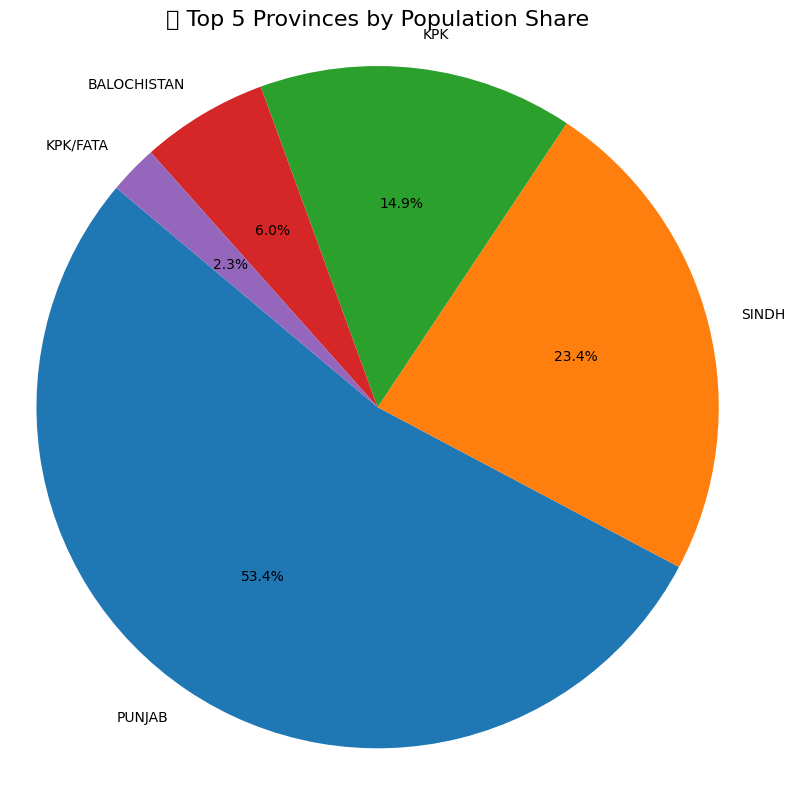

In [306]:
# 🎯 3. Pie chart: Top 5 Provinces by Population
top5_provinces = province_pop.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top5_provinces.values, labels=top5_provinces.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab10"))
plt.title('🥧 Top 5 Provinces by Population Share', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\ll\AppData\Local\Temp\ipykernel_7156\490492104.py:7: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ll\miniconda3\envs\py_dsa35\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ll\miniconda3\envs\py_dsa35\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


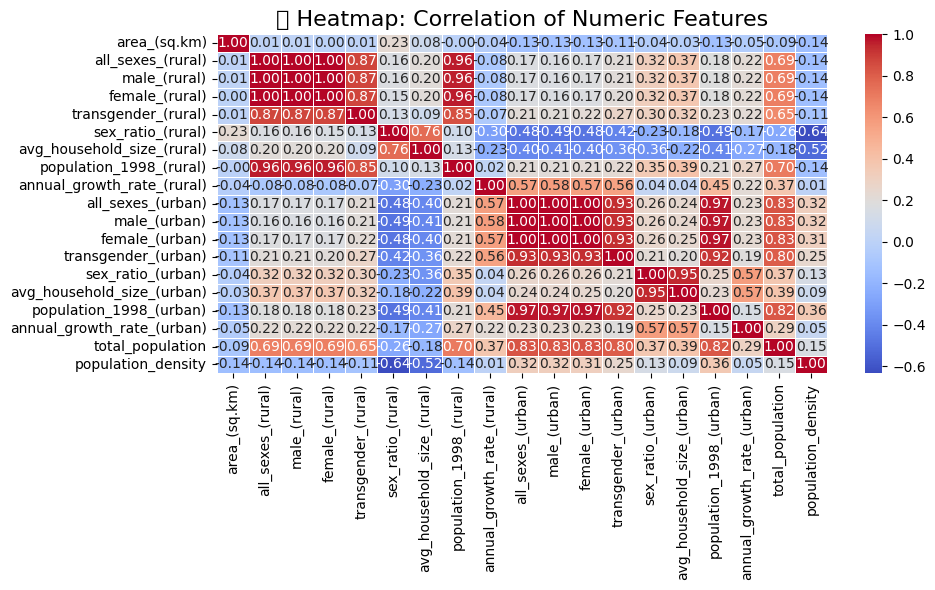

In [307]:
# 🎯 4. Heatmap: Correlation Matrix
plt.figure(figsize=(10, 6))
numerics = df.select_dtypes(include='number')
corr_matrix = numerics.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('🔥 Heatmap: Correlation of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\ll\AppData\Local\Temp\ipykernel_7156\342247663.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='province', y='population_density', palette='tab10')
C:\Users\ll\AppData\Local\Temp\ipykernel_7156\342247663.py:8: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ll\miniconda3\envs\py_dsa35\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ll\AppData\Local\Temp\ipykernel_7156\342247663.py:8: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ll\miniconda3\envs\py_dsa35\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.


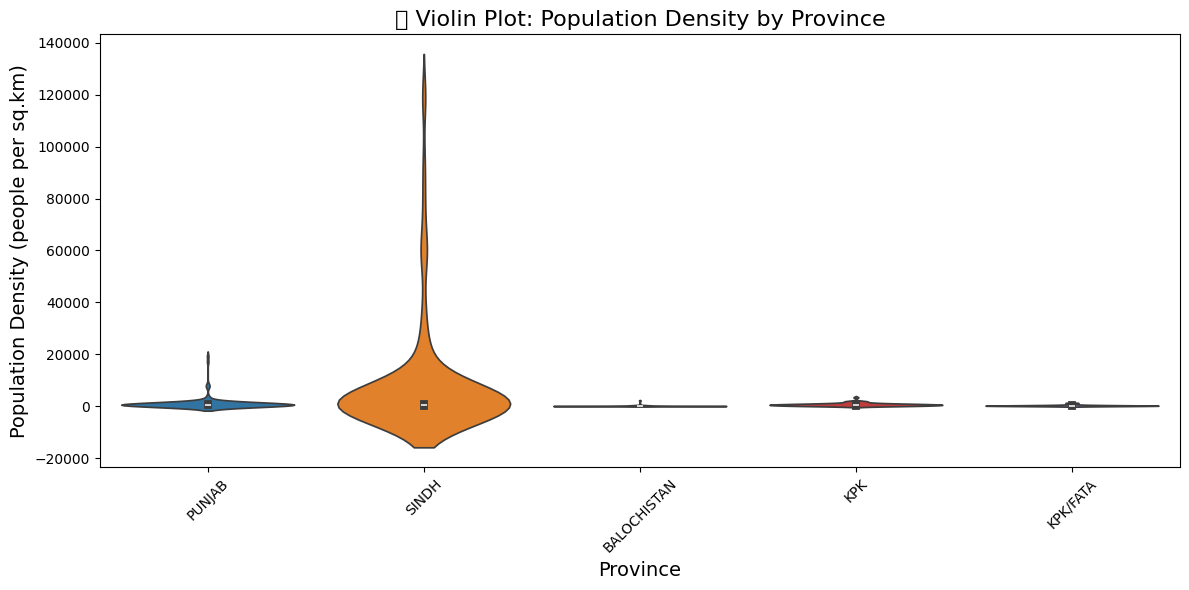

In [308]:
# 🎯 5. Violin plot: Population Density by Province
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='province', y='population_density', palette='tab10')
plt.title('🎻 Violin Plot: Population Density by Province', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Population Density (people per sq.km)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 7. Insights & Summary


Based on the exploratory data analysis and visualizations, the following key insights were derived:

- **Most Populated Province:** Punjab has the highest total population among all provinces, as shown in the bar and pie charts.
- **Least Populated Province:** Balochistan has the lowest total population, despite being the largest by area.
- **Most Populated Sub-Divisions:** The top 10 most populated sub-divisions are concentrated in Punjab and Sindh, with Lahore and Karachi sub-divisions leading.
- **Least Populated Sub-Divisions:** The least populated sub-divisions are mostly in Balochistan and Khyber Pakhtunkhwa, as seen in the horizontal bar chart.
- **Rural vs Urban Trends:** Punjab and Sindh have significant urban populations, while Balochistan and Khyber Pakhtunkhwa remain predominantly rural.
- **Population Density:** Punjab has the highest population density, while Balochistan has the lowest. The violin plot highlights the wide variation in density across provinces.
- **Outliers & Distribution:** Boxplots and histograms reveal outliers in both rural and urban populations, with some sub-divisions having exceptionally high or low populations.
- **Correlations:** The heatmap shows strong correlations between total, rural, and urban populations, and a moderate correlation with area and population density.


**Summary:**

The population of Pakistan is highly unevenly distributed, with Punjab and Sindh being the most populous and urbanized provinces. Balochistan, despite its size, remains sparsely populated. There are significant disparities in population density and urbanization across provinces and sub-divisions. These insights can inform policy decisions, resource allocation, and future urban planning initiatives.